# Inverse Laplacian and the Heat Kernel

In [29]:
from lib.spectral_clustering import spectral_clustering, laplacian_matrix, similarity_matrix
from lib.datasets import gaussian_mixture
from lib.kmeans import kmeans
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib import cm
from tqdm import tqdm

No handles with labels found to put in legend.


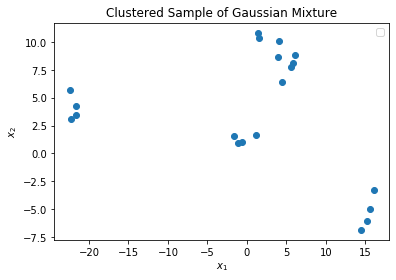

In [30]:
n_gaussians = 5
n_pts = 4
n = n_pts * n_gaussians
d = 2

data = gaussian_mixture(n_gaussians, n_pts, d, centroid_var=10)

plt.scatter(*data.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Clustered Sample of Gaussian Mixture")
plt.legend()
plt.savefig("artifacts/random_walk_clusters/Clustered_Sample_Gaussian.png", dpi=120)
plt.show()

In [31]:
data_graph = similarity_matrix(data, kernel=lambda x, y, s: s * np.linalg.norm(x-y))
transition_matrix = data_graph / np.sum(data_graph, axis=1).reshape((-1, 1))

lap, deg_diag = laplacian_matrix(transition_matrix)
l_sym = np.diag(1/np.sqrt(deg_diag)) @ lap @ np.diag(1/np.sqrt(deg_diag))



In [32]:
l_sym_inverse = np.linalg.pinv(l_sym)





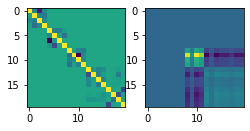

In [33]:
plt.subplot(1, 3, 1)
plt.imshow(l_sym)
plt.subplot(1, 3, 2)
plt.imshow(l_sym_inverse)

In [15]:
(l_sym_inverse == 0).any()


False